# 🚗 Tunisia Cars Price Prediction
## Multiple Linear Regression Model

**Project Goal:** Predict used car prices in Tunisia using Multiple Linear Regression

**Dataset:** 60,000 cars across 24 governorates with 23 brands

**Team Members:**
- Khalil Amamri
- Montassar Zreilli
- Wassim Mnassri
- Mahdi Hadj Amor

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [21]:
# Load Dataset
df = pd.read_csv('../data/raw/tunisia_cars_dataset.csv')
print(f'Dataset shape: {df.shape}')
display(df.head())

Dataset shape: (60000, 23)


,brand,model,year,mileage,fuel,gearbox,vehicle_condition,car_body,horsepower,engine_size,number_of_owners,accident_history,import_or_local,location,color,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
0,Skoda,Octavia,2013,109951,Essence,Manuelle,tres bon etat,SUV,202,2.6,1,0,local,Sidi Bouzid,noir,0,0,1,0,1,1,0,21611
1,Seat,Leon,2014,140294,Essence,Manuelle,tres bon etat,berline,169,2.0,2,0,local,Tozeur,vert,0,0,0,1,0,0,1,17296
2,Dacia,Dokker,2024,11848,Essence,Automatique,excellent,SUV,172,2.3,1,0,local,Siliana,rouge,1,1,1,0,0,0,1,20808
3,Hyundai,i20,2017,105169,Hybride,Manuelle,excellent,citadine,88,1.2,1,0,local,Medenine,rouge,0,0,0,0,1,0,0,22223
4,Renault,Duster,2016,150312,Essence,Manuelle,moyen,citadine,60,0.9,1,0,imported,Tataouine,bleu,0,0,0,0,1,1,1,15886


---
## 📊 1. Data Loading

---
## 🔍 2. Exploratory Data Analysis (EDA)

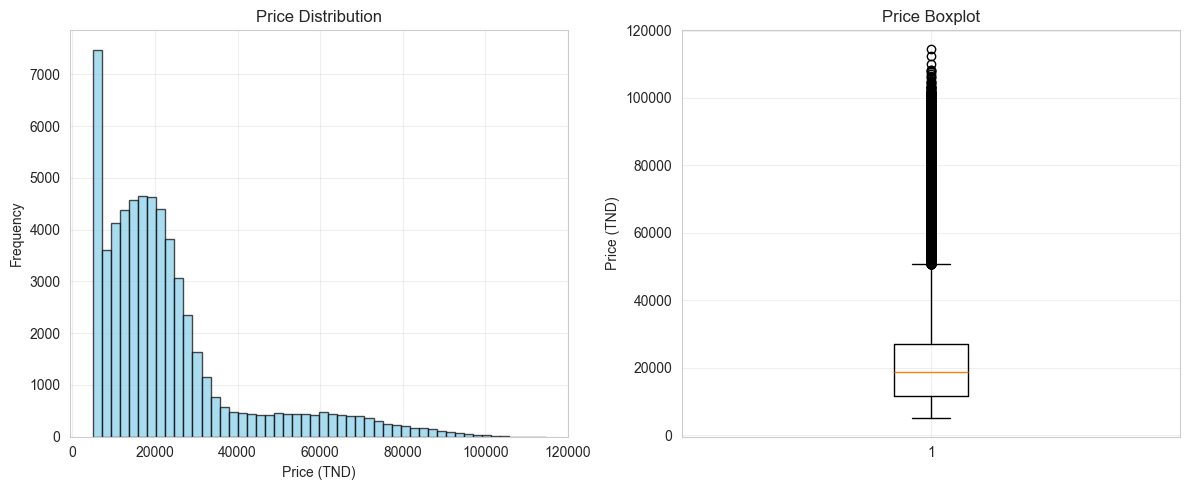

In [22]:
# Price Distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Price (TND)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price (TND)')
plt.title('Price Boxplot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

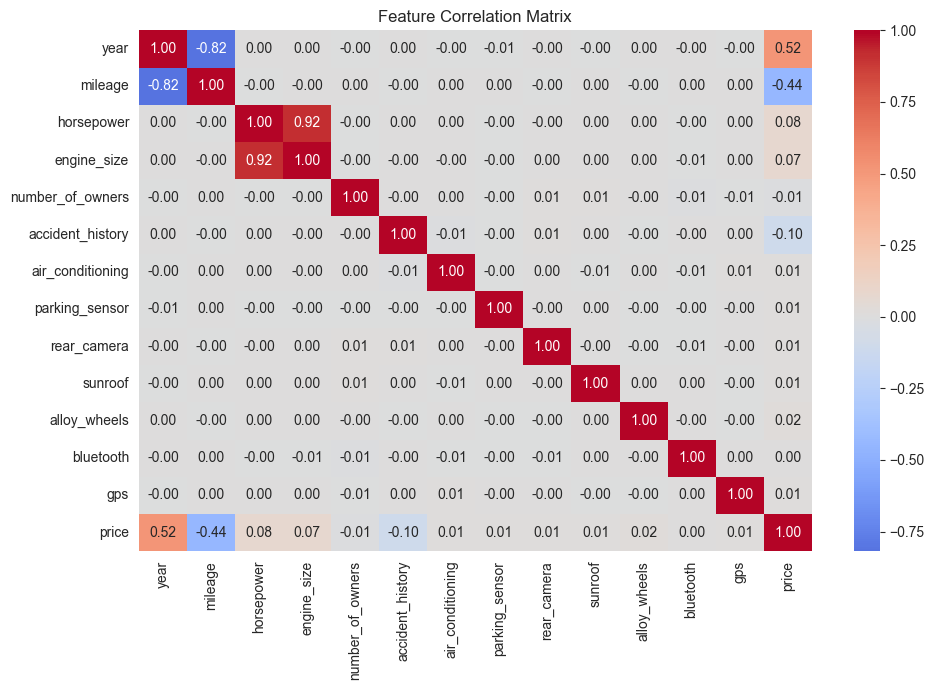

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [24]:
# Feature Engineering
categorical_cols = ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color']

# Create engineered features
df['age'] = 2025 - df['year']
df['mileage_per_year'] = df['mileage'] / df['age'].replace(0,1)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
print(f'Features: {X.shape} | Target: {y.shape}')

Features: (60000, 178) | Target: (60000,)


---
## ⚙️ 3. Data Preprocessing & Feature Engineering

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_test = lin_reg.predict(X_test_scaled)
y_pred_test = np.maximum(y_pred_test, 0)  # Ensure no negative prices

print('✓ Model trained successfully')

✓ Model trained successfully


---
## 🤖 4. Model Training

MODEL PERFORMANCE
R² Score:  0.8991  (89% of variance explained)
MAE:       3,876 TND  (Average error)
RMSE:      5,788 TND  (Root mean squared error)


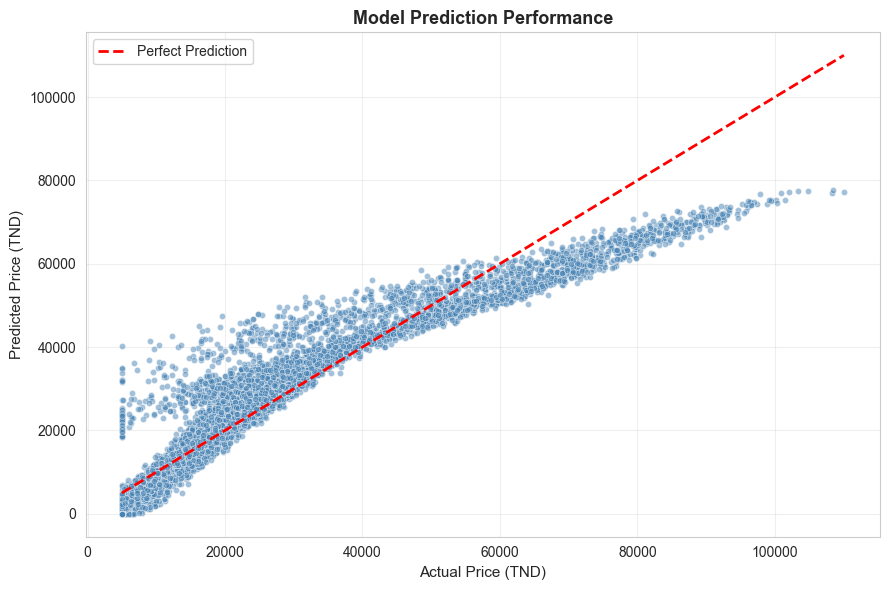

In [26]:
# Calculate performance metrics
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display results
print('='*50)
print('MODEL PERFORMANCE')
print('='*50)
print(f'R² Score:  {r2_test:.4f}  (89% of variance explained)')
print(f'MAE:       {mae:,.0f} TND  (Average error)')
print(f'RMSE:      {rmse:,.0f} TND  (Root mean squared error)')
print('='*50)

# Visualization: Actual vs Predicted
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=20, color='steelblue', edgecolor='white', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (TND)', fontsize=11)
plt.ylabel('Predicted Price (TND)', fontsize=11)
plt.title('Model Prediction Performance', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 📈 5. Model Evaluation

In [27]:
# Save model and preprocessing objects
artifact = {
    'model_name': 'Linear Regression',
    'model': lin_reg,
    'scaler': scaler,
    'numeric_columns': numeric_cols,
    'feature_columns': X_train_scaled.columns.tolist(),
    'categorical_columns': ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color'],
    'engineered_features': ['age', 'mileage_per_year'],
    'metrics': {
        'r2_test': r2_test,
        'mae': mae,
        'rmse': rmse
    }
}

joblib.dump(artifact, '../models/linear_regression_tunisia_cars.pkl')
print('✓ Model saved successfully at ../models/linear_regression_tunisia_cars.pkl')
print('✓ Ready for deployment in Streamlit app')

✓ Model saved successfully at ../models/linear_regression_tunisia_cars.pkl
✓ Ready for deployment in Streamlit app
